In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import pylab 
import seaborn as sns
import sklearn

In [3]:
Data_1 = pd.read_csv('C://Users//cocod//Downloads//ttest_data.csv', index_col='Unnamed: 0')
Data_1

,engine1,engine2
2020-03-01 09:00:00,24.432799,25.487918
2020-03-01 09:01:00,25.608757,27.429119
2020-03-01 09:02:00,24.339832,26.229394
2020-03-01 09:03:00,24.337996,26.692126
2020-03-01 09:04:00,25.672295,27.311690
...,...,...
2020-03-02 01:35:00,26.595020,26.773474
2020-03-02 01:36:00,25.225894,27.255199
2020-03-02 01:37:00,26.007607,27.013185
2020-03-02 01:38:00,24.238527,27.069309


In [4]:
#homogeniety
stats.levene(Data_1['engine1'], Data_1['engine2'])


LeveneResult(statistic=0.43116403102930584, pvalue=0.5114939468829216)

In [5]:
# Shapiro-Wilk test for normality
normality1 = stats.shapiro(Data_1['engine1'])
normality2 = stats.shapiro(Data_1['engine2'])
normality1,normality2

(ShapiroResult(statistic=0.998535692691803, pvalue=0.5781129002571106),
 ShapiroResult(statistic=0.9974772334098816, pvalue=0.1250537484884262))

<AxesSubplot:xlabel='engine1', ylabel='Density'>

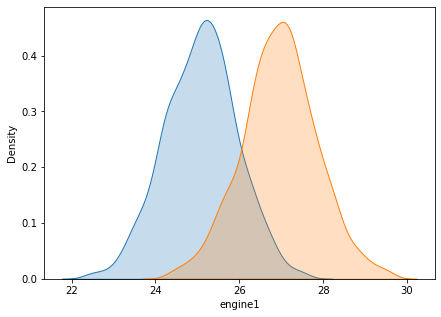

In [6]:
plt.figure(figsize=(7,5))
sns.kdeplot(Data_1['engine1'],shade=True)
sns.kdeplot(Data_1['engine2'],shade=True)

In [7]:
#Paired t-Test
#correlation according the timestamp (a machine with two engines)
stats.ttest_rel(Data_1['engine1'], Data_1['engine2'])


Ttest_relResult(statistic=-47.72767438984563, pvalue=6.135853410374217e-260)

In [9]:
#independant sample sets
stats.ttest_ind(Data_1.loc['2020-03-01 09:00:00':'2020-03-01 17:19:00','engine1'], Data_1.loc['2020-03-01 17:20:00':'2020-03-02 01:39:00','engine2'])



Ttest_indResult(statistic=-34.53415362915837, pvalue=1.4398921919400768e-172)

Exercice 1

In [11]:
Data_2 = pd.read_csv('C://Users//aalaoui//Downloads//bearing_lof_svm_data.csv')
Data_2

,LOF,SVM
0,0.945336,0.891870
1,0.949968,0.896527
2,0.952799,0.881511
3,0.945164,0.889951
4,0.950367,0.885722
...,...,...
195,0.959437,0.877882
196,0.945508,0.881082
197,0.948289,0.889195
198,0.951143,0.890698


In [13]:
#homogeneity
stats.levene(Data_2.loc[0:99,'LOF'], Data_2.loc[100:199,'SVM'])

LeveneResult(statistic=0.2411184924633173, pvalue=0.6239432550543006)

In [29]:
# Shapiro-Wilk test for normality
normality_lof = stats.shapiro(Data_2['LOF'])
normality_svm = stats.shapiro(Data_2['SVM'])
normality_lof,normality_svm

(ShapiroResult(statistic=0.996601402759552, pvalue=0.9409411549568176),
 ShapiroResult(statistic=0.9826797842979431, pvalue=0.014472882263362408))

In [14]:
# Shapiro-Wilk test for normality
normality_lof = stats.shapiro(Data_2.loc[0:99,'LOF'])
normality_svm = stats.shapiro(Data_2.loc[100:199,'SVM'])
normality_lof,normality_svm

(ShapiroResult(statistic=0.9925774335861206, pvalue=0.8613125085830688),
 ShapiroResult(statistic=0.978970468044281, pvalue=0.11048018932342529))

In [12]:
stats.ttest_ind(Data_2.loc[0:99,'LOF'], Data_2.loc[100:199,'SVM'])


Ttest_indResult(statistic=84.80533632721068, pvalue=1.3591606782217719e-157)

In [15]:
Data_3 = pd.read_csv('C://Users//aalaoui//Downloads//bearing_scores_predict_data.csv')
Data_3

,Normal_data,abnormal_data
0,-0.000100,0.806645
1,-0.001228,0.800665
2,0.013456,0.803835
3,-0.002552,0.804250
4,-0.002068,0.799185
...,...,...
195,-0.014474,0.806581
196,0.000286,0.799280
197,0.001933,0.799654
198,0.004932,0.808005


In [18]:
#homogeneity
stats.levene(Data_3['Normal_data'], Data_3['abnormal_data'])

LeveneResult(statistic=0.004355381078916193, pvalue=0.9474146956665849)

In [19]:
# Shapiro-Wilk test for normality
normality_before = stats.shapiro(Data_3['Normal_data'])
normality_after = stats.shapiro(Data_3['abnormal_data'])
normality_before,normality_after

(ShapiroResult(statistic=0.9940854907035828, pvalue=0.6133137345314026),
 ShapiroResult(statistic=0.9929797053337097, pvalue=0.45763516426086426))

In [25]:
#Paired t-Test
stats.ttest_ind(Data_3['Normal_data'], Data_3['abnormal_data'])


Ttest_indResult(statistic=-1126.4285675003778, pvalue=0.0)

In [26]:
fvalue, pvalue = stats.f_oneway(Data_3['Normal_data'], Data_3['abnormal_data'])
print(fvalue, pvalue)

1268841.317680999 0.0


In [28]:
fvalue, pvalue = stats.f_oneway(Data_2.loc[0:99,'LOF'], Data_2.loc[100:199,'SVM'])
print(fvalue, pvalue)

7191.945069571355 1.3591606782210601e-157
